In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.size'] = 24

## Trying to identify shot locations from Djokovic - Murray practice session

In [3]:
nole_andy_rome, sr = librosa.load('/home/arvindn/Research/TopicsOfInterest/Sports/Tennis/NovakDjokovic_AndyMurrayPracticeCourt-LevelHighlights_Rome2021.mp3')

# I have copied this file as well as the corresponding video file to "RawData" folder in Google Drive.

/home/arvindn/anaconda3/envs/python39/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


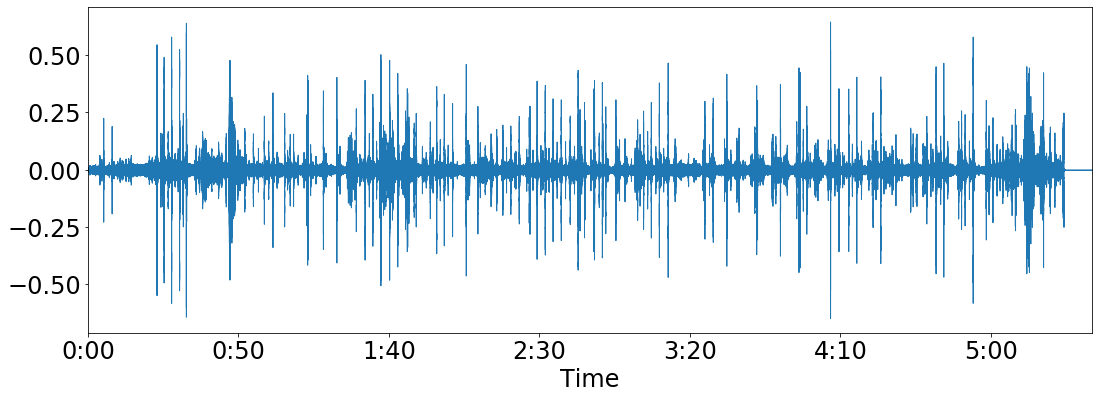

In [4]:
fig, ax = plt.subplots(figsize=(18,6))
librosa.display.waveplot(nole_andy_rome, sr=sr,ax=ax)

### Computing instantaneous energy at $n^{th}$ sample as $\displaystyle \frac{x_n^2}{\sum\limits_k x_k^2}$

In [5]:
nole_andy_rome_Energy = nole_andy_rome**2
nole_andy_rome_Energy = nole_andy_rome_Energy/nole_andy_rome_Energy.sum()

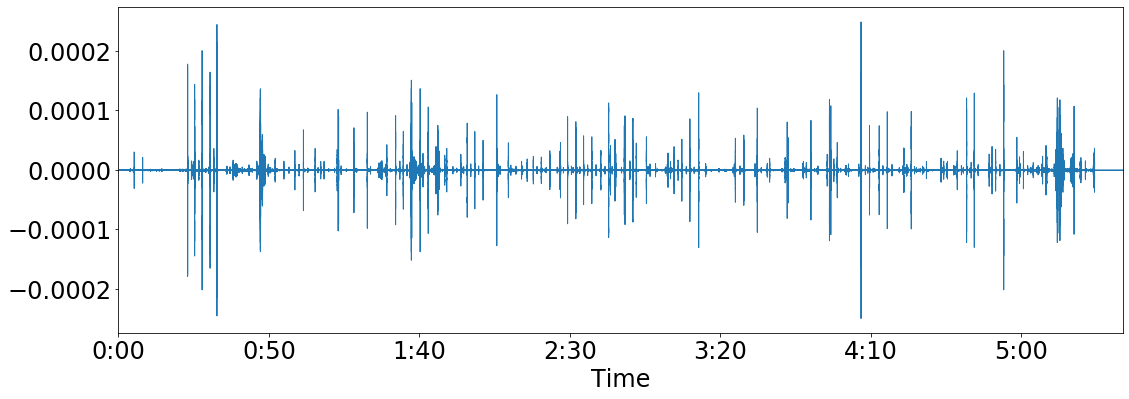

In [6]:
fig, ax = plt.subplots(figsize=(18,6))
librosa.display.waveplot(nole_andy_rome_Energy, sr=sr,ax=ax)
# I think librosa plots any waveform by subtracting out the average. Hence, energy also shows negative values. I could 
# have plotted using matplotlib, but librosa is much faster (at least I've noticed that)

### **Calculating event onset using the energy signal**. I could have done it using the original signal, but this does preserve the contrast between peaks and non-peaks better. You would be justified in asking why not the 4th power or 6th - those will be even better. I do not have a good eneough answer for that. At least the second power has a physical meaning - it is related to energy content. 

I used the video from which the audio was derived and counted about 155 ball-racket strikes. I get the number of events at 168. That is not bad for a start.

In [7]:
eventOnset =  librosa.onset.onset_detect(nole_andy_rome_Energy, sr=sr, units='samples')

In [8]:
len(eventOnset)

168

In [9]:
eventOnset

array([ 113664,  504320,  532992,  546816,  556032,  586752,  610816,
        668672,  695296,  696832,  718848,  838144, 1011712, 1034240,
       1037824, 1052160, 1057280, 1062400, 1095680, 1146880, 1210368,
       1290240, 1321984, 1353216, 1438720, 1480192, 1504256, 1600512,
       1605120, 1607680, 1610752, 1722880, 1821184, 1908224, 1918976,
       1928192, 1954816, 1964032, 2028032, 2059776, 2084864, 2112512,
       2137600, 2140672, 2143744, 2146816, 2160128, 2172416, 2180608,
       2207232, 2209792, 2219520, 2228736, 2231296, 2267648, 2308096,
       2324480, 2337792, 2349568, 2388480, 2402816, 2506240, 2552832,
       2608640, 2669056, 2769408, 2793984, 2854912, 2909184, 2951168,
       2992640, 3037696, 3096064, 3158016, 3231744, 3236352, 3288064,
       3348992, 3405312, 3435520, 3465728, 3531776, 3589120, 3602944,
       3635712, 3641344, 3703808, 3708928, 3744768, 3766784, 3770368,
       3791360, 3866112, 3932672, 4024320, 4042752, 4068352, 4098560,
       4125184, 4184